# Term Deposit Marketing

**Background:**

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

**Data Description:**

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

**Attributes:**

- age : age of customer (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (binary)
- balance: average yearly balance, in euros (numeric)
- housing: has a housing loan? (binary)
- loan: has personal loan? (binary)
- contact: contact communication type (categorical)
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical)
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Output (desired target):**

y - has the client subscribed to a term deposit? (binary)


# Identifying x and y
After loading the data and reading it as a pandas dataframe we can see that columns 0 to 12 hold the x data and column 13 holds the y data to predict. Additionally, there is a mixture of datatypes. We have int64 as well as 'Object' with int64 being the number datatypes and Object being the dataypes expressed in text. So our model will need to be able to handle these two data types together.

# Features
The features include a mixture of binary features such as default (yes/no), category features such as job ('management', 'technician', 'entrepreneur', ...), and numerical features such as balanace.

# Binary Classification

The y data shows the subscription status of the client which can only be a yes or a no. This indicates that we are creating a binary classificaiton model as there are only two options to predict.

In [2]:
import pandas as pd

# Load the data
file_path = 'term-deposit-marketing-2020.csv'
data = pd.read_csv(file_path)

# Display basic info and first few rows of the data
data_info = data.info()
data_head = data.head()

(data_info, data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign   y  
 0  unknown    5   may       261         1  no  
 1  unknown    5   may       151         1  no  
 2  unknown    5   may        76         1  no  
 3  unknown    5   may        92         1  no  
 4  unknown    5   may       198         1  no  )

# Class Distribution
When viewing the distribution of the target variable we can see that it is an imbalanced dataset with a much higher likelyhood of a client not subscribing to the term deposit with 92.76% not subscribed and 7.24% who have subscribed to the term deposit.

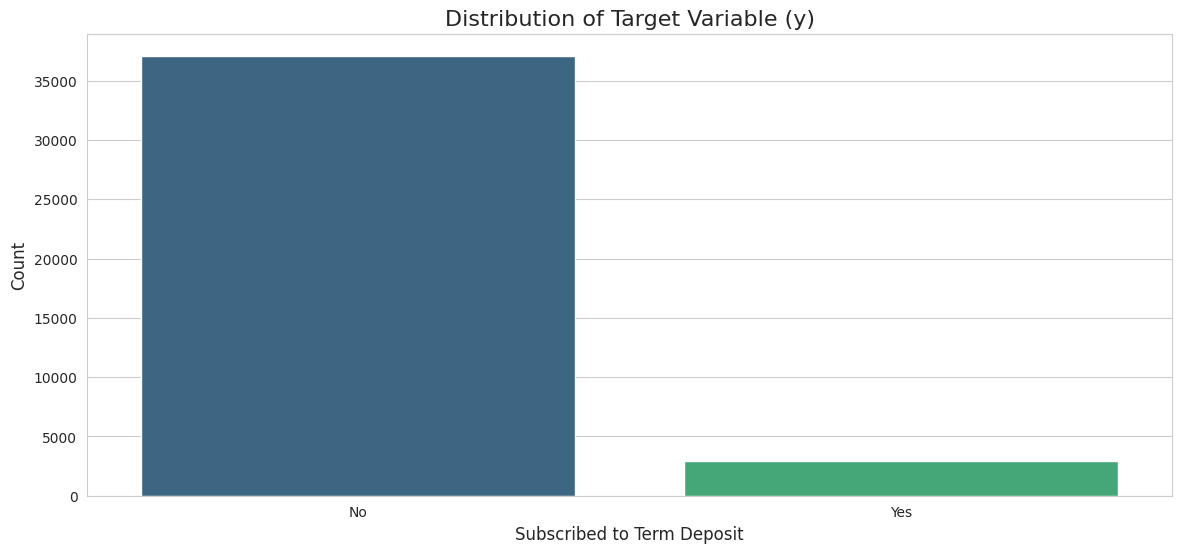

no     92.76
yes     7.24
Name: y, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# Plot the distribution of the target variable 'y'
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Distribution of Target Variable (y)', fontsize=16)
plt.xlabel('Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display the percentage of each class in the target variable
class_distribution = data['y'].value_counts(normalize=True) * 100
class_distribution


# Feature Distribution
Analysing the distribution of database features gives us some insight into similar trends. Subscription status appears to be a minority no matter which feature we look at independently. Although the ratio of yes to no can vary depending on the feature, indicating that there may be some patterns to follow here.

# Observations
- Most common subscriber age is in early thirties
- A higher frequency of people with blue collar jobs subscribing as well as other high paying professions such as management and technician
- Married people more likely to subscribe than single people
- There is a distinctly high number of subscribers during the month of May

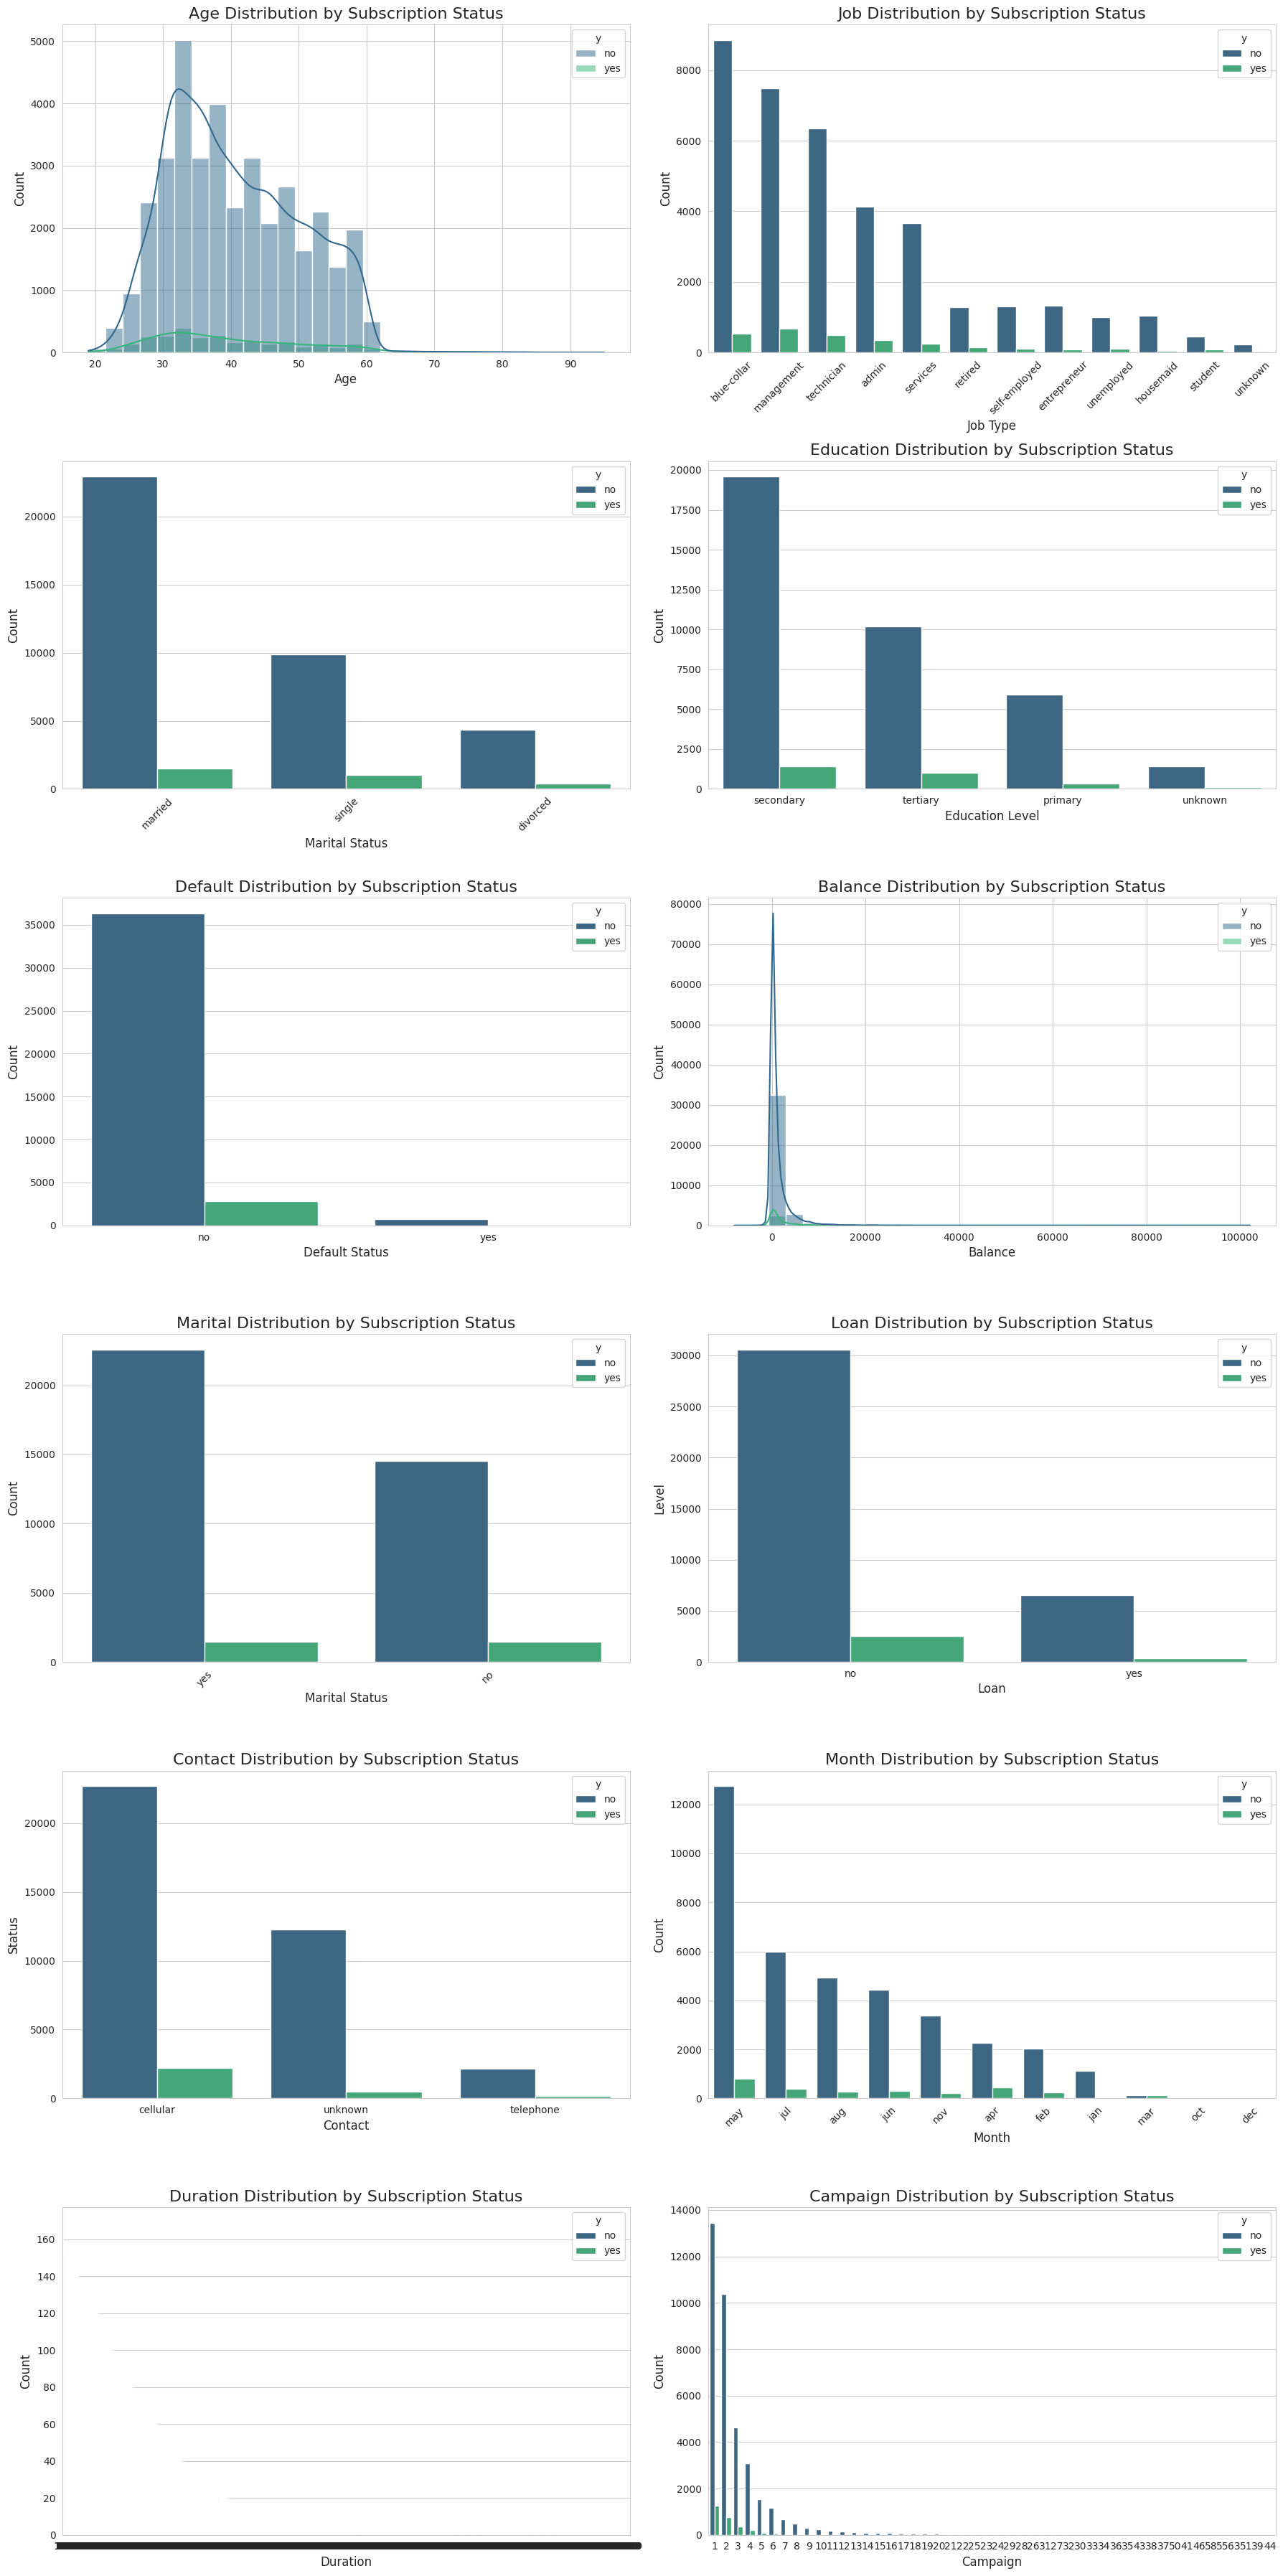

In [21]:
# Initialize the figure
fig, ax = plt.subplots(6, 2, figsize=(18, 36))
ax = ax.flatten()

# Plot Age distribution
sns.histplot(data=data, x='age', hue='y', bins=30, ax=ax[0], kde=True, palette='viridis')
ax[0].set_title('Age Distribution by Subscription Status', fontsize=16)
ax[0].set_xlabel('Age', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Plot Job distribution
sns.countplot(data=data, x='job', hue='y', ax=ax[1], palette='viridis', order=data['job'].value_counts().index)
ax[1].set_title('Job Distribution by Subscription Status', fontsize=16)
ax[1].set_xlabel('Job Type', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

# Plot Marital distribution
sns.countplot(data=data, x='marital', hue='y', ax=ax[2], palette='viridis', order=data['marital'].value_counts().index)
ax[3].set_title('Marital Distribution by Subscription Status', fontsize=16)
ax[2].set_xlabel('Marital Status', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

# Plot Education distribution
sns.countplot(data=data, x='education', hue='y', ax=ax[3], palette='viridis', order=data['education'].value_counts().index)
ax[3].set_title('Education Distribution by Subscription Status', fontsize=16)
ax[3].set_xlabel('Education Level', fontsize=12)
ax[3].set_ylabel('Count', fontsize=12)

# Plot Default distribution
sns.countplot(data=data, x='default', hue='y', ax=ax[4], palette='viridis', order=data['default'].value_counts().index)
ax[4].set_title('Default Distribution by Subscription Status', fontsize=16)
ax[4].set_xlabel('Default Status', fontsize=12)
ax[4].set_ylabel('Count', fontsize=12)

# Plot Balance distribution
sns.histplot(data=data, x='balance', hue='y', bins=30, ax=ax[5], kde=True, palette='viridis')
ax[5].set_title('Balance Distribution by Subscription Status', fontsize=16)
ax[5].set_xlabel('Balance', fontsize=12)
ax[5].set_ylabel('Count', fontsize=12)

# Plot Housing distribution
sns.countplot(data=data, x='housing', hue='y', ax=ax[6], palette='viridis', order=data['housing'].value_counts().index)
ax[6].set_title('Marital Distribution by Subscription Status', fontsize=16)
ax[6].set_xlabel('Marital Status', fontsize=12)
ax[6].set_ylabel('Count', fontsize=12)
ax[6].tick_params(axis='x', rotation=45)

# Plot Loan distribution
sns.countplot(data=data, x='loan', hue='y', ax=ax[7], palette='viridis', order=data['loan'].value_counts().index)
ax[7].set_title('Loan Distribution by Subscription Status', fontsize=16)
ax[7].set_xlabel('Loan', fontsize=12)
ax[7].set_ylabel('Level', fontsize=12)

# Plot Day distribution
sns.countplot(data=data, x='contact', hue='y', ax=ax[8], palette='viridis', order=data['contact'].value_counts().index)
ax[8].set_title('Contact Distribution by Subscription Status', fontsize=16)
ax[8].set_xlabel('Contact', fontsize=12)
ax[8].set_ylabel('Status', fontsize=12)

# Plot Month distribution
sns.countplot(data=data, x='month', hue='y', ax=ax[9], palette='viridis', order=data['month'].value_counts().index)
ax[9].set_title('Month Distribution by Subscription Status', fontsize=16)
ax[9].set_xlabel('Month', fontsize=12)
ax[9].set_ylabel('Count', fontsize=12)
ax[9].tick_params(axis='x', rotation=45)

# Plot Duration distribution
sns.countplot(data=data, x='duration', hue='y', ax=ax[10], palette='viridis', order=data['duration'].value_counts().index)
ax[10].set_title('Duration Distribution by Subscription Status', fontsize=16)
ax[10].set_xlabel('Duration', fontsize=12)
ax[10].set_ylabel('Count', fontsize=12)

# Plot Campaign distribution
sns.countplot(data=data, x='campaign', hue='y', ax=ax[11], palette='viridis', order=data['campaign'].value_counts().index)
ax[11].set_title('Campaign Distribution by Subscription Status', fontsize=16)
ax[11].set_xlabel('Campaign', fontsize=12)
ax[11].set_ylabel('Count', fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()


# Preprocessing

As mentioned previously, the data is split into numerical data and categorical data. So we need to identify the categorical columns and the numerical columns, then use a standard scaler for the numerical data, and one-hot encoding for the categorical data. This way all the data is standardized and ready to process.

Next, we define the model target and features and split the data into train and test sets.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numerical columns
categorical_cols = [cname for cname in data.columns if
                    data[cname].dtype == "object" and
                    cname != 'y']  # excluding target variable
numerical_cols = [cname for cname in data.columns if
                  data[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: standard scaling
numerical_transformer = Pipeline(steps=[
    ('standard_scaler', StandardScaler())
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model target and features
y = data['y']
X = data.drop('y', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Ensure the target is binary encoded
y_train = y_train.apply(lambda x: 1 if x == 'yes' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

# Preprocessing of training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Preprocessing for categorical data: one-hot encoding (without specifying sparse_output)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocessing of training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train).toarray()  # Ensure dense array
X_test_preprocessed = preprocessor.transform(X_test).toarray()  # Ensure dense array

# Get feature names after one-hot encoding for later usage
onehot_columns = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols))
new_feature_names = numerical_cols + onehot_columns

# Convert preprocessed data into DataFrame for better visualization & future use
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=new_feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=new_feature_names)

# Show the preprocessed training data
X_train_preprocessed.head()



,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0.148967,-0.434444,1.689498,0.376154,-0.272055,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.978597,-0.434444,-1.208363,0.279090,-0.581924,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.888070,-0.406906,0.119824,-0.520724,-0.581924,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.473255,-0.167222,-0.725386,-0.412012,-0.581924,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.888070,-0.454503,-1.449851,-0.241178,-0.581924,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Random Forest Classifier
We have trained a Random Forest classifier on our training data and evaluated the model using the ROC AUC score. This is the best model evaluation for imbalanced datasets such as this.

The confusion matrix shows 7348 true negatives, 457 false negatives, 122 true positives, and 73 falst positives.
Predicting a Yes: 122/(122+73) = 62.5% accuracy
Predicting a No: 7348/(7348+457) = 94.1% accuracy

The prediction capability of the model comes in at 93% which appears impressive until we look at the yes cases independently, which are only predicted with a 62.5% accuracy. Since the dataset is imbalanced and skewed towards No results, the high accuracy of predicting a No tends to make it easy to achieve an overall high prediction accuracy. But it is the yes cases that we are really interested in predicting. Hence we should place some focus on predicting a Yes outcome and improving the 62.5% accuracy of a subscription to the term deposit.

The ROC AUC tells us how efficient the model is at distinguising between a yes and a no.

The ROC AUC score is:
Training Data: 0.9998
Test Data: 0.6004

The ROC AUC scores above indicate that the model performs very well on the training data, being close to 1. However, on the test data it does not perform so well as this score drops to 0.6. This could indicate overfitting.

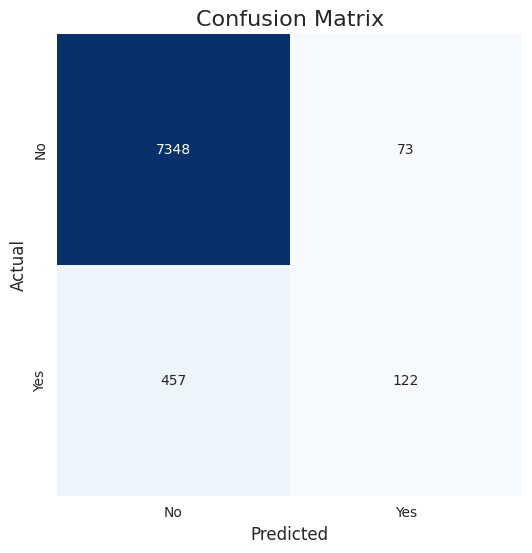

(0.9997842037116962,
 0.6004355841228237,
 '              precision    recall  f1-score   support\n\n          No       0.94      0.99      0.97      7421\n         Yes       0.63      0.21      0.32       579\n\n    accuracy                           0.93      8000\n   macro avg       0.78      0.60      0.64      8000\nweighted avg       0.92      0.93      0.92      8000\n')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier with class weight balanced
rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')

# Fit the model
rf_model.fit(X_train_preprocessed, y_train)

# Predictions
train_preds = rf_model.predict(X_train_preprocessed)
test_preds = rf_model.predict(X_test_preprocessed)

# Evaluate the model
train_roc_auc = roc_auc_score(y_train, train_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)

# Classification report & confusion matrix
class_report = classification_report(y_test, test_preds, target_names=['No', 'Yes'])
conf_matrix = confusion_matrix(y_test, test_preds)

# Visualization of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

(train_roc_auc, test_roc_auc, class_report)

# Optimizing the Model
After optimizing for 'Yes' we achieved a precision of 0.70, a 7% increase from 0.63. The macro avg of 0.82 represents the equally weighted accuracy of a Yes and a No while the new weighted agv accuracy has dropped to 0.92. This 1% decrease represents a drop in the precision of a No predictions which is not as important as our significant increase in being able to accurately predict a Yes which could miss a business opportunity.

We also obtain the 5-Fold Cross Validation ROC AUC scores. The mean value comes out with an accuracy of 93% which is a good performance for the model.

# Conclusion
The Random Forest Classifier performs well to on this binary classification problem, achieving a 5-fold cross validation score of 93%. Considering the goal of the data is to find business opportunities to get term deposit subscriptions, we optimized the model to achieve a higher precision within the 'yes' classificaiton. After some trial and error of the Random Forest Classifier model parameters, the precision of a Yes classification was able to be increased from 63% to 70%. This was the most important part to consider when optimizing the model and the final value of 70% is a reasonable performance that will assist in finding more business opportunities in future datasets.

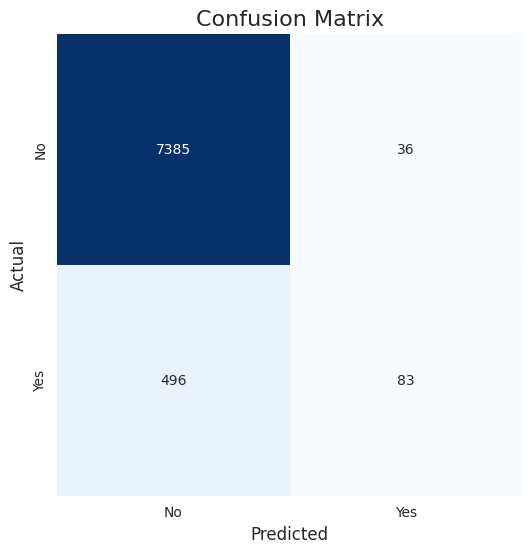

1.0
0.5692497531278807
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      7421
         Yes       0.70      0.14      0.24       579

    accuracy                           0.93      8000
   macro avg       0.82      0.57      0.60      8000
weighted avg       0.92      0.93      0.91      8000

Cross Validation Scores:[0.93819609 0.93456709 0.9234882  0.93354583 0.93077053]
Mean Accuracy: 0.9321135491106471


In [27]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier with class weight balanced
rf_model = RandomForestClassifier(random_state=1,
                                  n_estimators=80,
                                  criterion="entropy",
                                  max_features=3,
                                  class_weight='balanced')

# Fit the model
rf_model.fit(X_train_preprocessed,y_train)

# Predictions
train_preds = rf_model.predict(X_train_preprocessed)
test_preds = rf_model.predict(X_test_preprocessed)

# Evaluate the model
train_roc_auc = roc_auc_score(y_train, train_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)

# Classification report & confusion matrix
class_report = classification_report(y_test, test_preds, target_names=['No', 'Yes'])
conf_matrix = confusion_matrix(y_test, test_preds)

# Visualization of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

#(train_roc_auc, test_roc_auc, class_report)
print(train_roc_auc)
print(test_roc_auc)
print(class_report)

# Perform 5-fold cross-validation and calculate the ROC AUC score
cv_scores = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate the average ROC AUC score from the cross-validation
cv_scores_mean = cv_scores.mean()

print("Cross Validation Scores:" + str(cv_scores))
print("Mean Accuracy: " + str(cv_scores_mean))